In [2]:
import h5py
import torch
from gwpy.timeseries import TimeSeries

In [3]:
# ifo = "L1"
ifo = "H1"
# gps_start, duration = 1369291863, 16384
# gps_start, duration = 1242960189, 1024
gps_start, duration = 1242962000, 4096
# fname = f"/data/dc-demo/data/{ifo[0]}-{ifo}_lldata-{gps_start}-{duration}.hdf5"
# fname = f"/data/dc-demo/data/O3_AC_train_{ifo}-{gps_start}-{duration}.hdf5"
fname = f"/data/dc-demo/data/O3_AC_clean_{ifo}-{gps_start}-{duration}.hdf5"

with h5py.File(fname, 'r') as f:
    print(list(f.keys()))
    strain_array = f[f"{ifo}:GDS-CALIB_STRAIN"][:]
    witness_array = f[f"{ifo}:PEM-CS_MAINSMON_EBAY_1_DQ"][:]

['H1:ASC-CHARD_P_INMON', 'H1:ASC-CHARD_Y_INMON', 'H1:ASC-CSOFT_P_INMON', 'H1:ASC-CSOFT_Y_INMON', 'H1:ASC-DHARD_P_INMON', 'H1:ASC-DHARD_Y_INMON', 'H1:ASC-DSOFT_P_INMON', 'H1:ASC-DSOFT_Y_INMON', 'H1:ASC-INP1_P_INMON', 'H1:ASC-INP1_Y_INMON', 'H1:ASC-MICH_P_INMON', 'H1:ASC-MICH_Y_INMON', 'H1:ASC-PRC1_P_INMON', 'H1:ASC-PRC1_Y_INMON', 'H1:ASC-PRC2_P_INMON', 'H1:ASC-PRC2_Y_INMON', 'H1:ASC-SRC1_P_INMON', 'H1:ASC-SRC1_Y_INMON', 'H1:ASC-SRC2_P_INMON', 'H1:ASC-SRC2_Y_INMON', 'H1:GDS-CALIB_STRAIN', 'H1:PEM-CS_MAINSMON_EBAY_1_DQ']


In [4]:
strain = TimeSeries(
    strain_array,
    t0=gps_start,
    sample_rate=4096,
)
witness = TimeSeries(
    witness_array,
    t0=gps_start,
    sample_rate=4096,
)

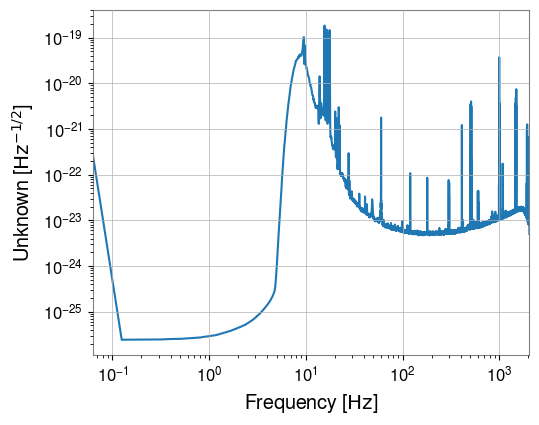

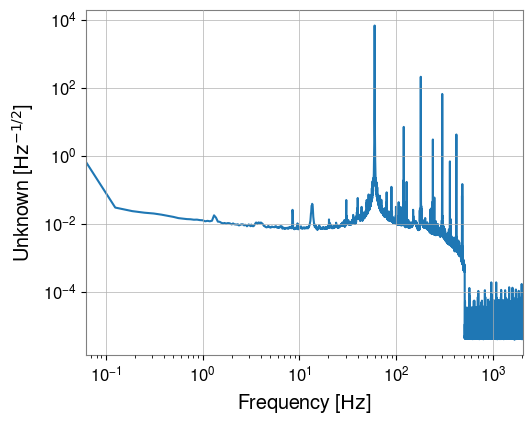

In [5]:
fftlength = 16
overlap = fftlength/2
strain_asd = strain.asd(fftlength=fftlength, overlap=overlap)
witness_asd = witness.asd(fftlength=fftlength, overlap=overlap)

strain_asd.plot().show()
witness_asd.plot().show()

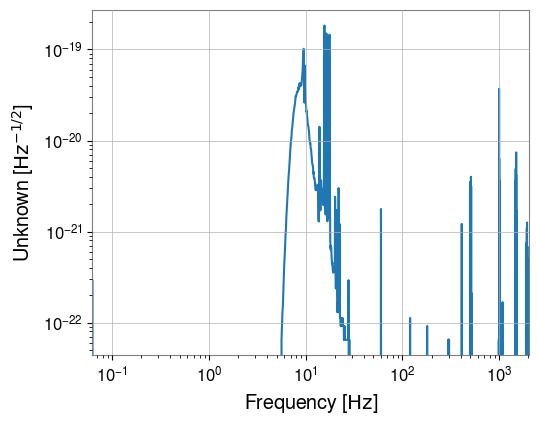

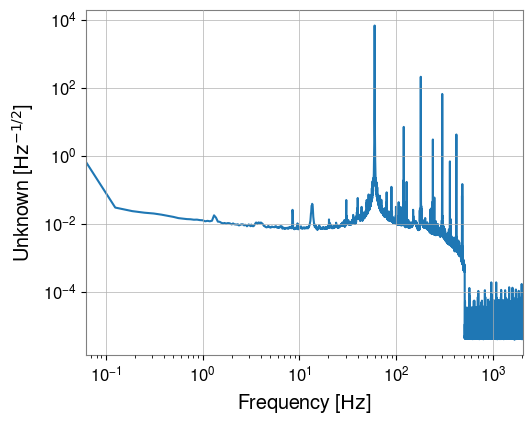

In [6]:
strain_tensor = torch.Tensor(strain_array)
strain_array2 = strain_tensor.cpu().numpy()
strain2 = TimeSeries(
    strain_array2,
    t0 = gps_start,
    sample_rate=4096
)
strain2_asd = strain2.asd(fftlength=fftlength, overlap=overlap)
strain2_asd.plot().show()

witness_tensor = torch.Tensor(witness_array)
witness_array2 = witness_tensor.cpu().numpy()
witness2 = TimeSeries(
    witness_array2,
    t0 = gps_start,
    sample_rate=4096
)
witness2_asd = witness.asd(fftlength=fftlength, overlap=overlap)
witness2_asd.plot().show()

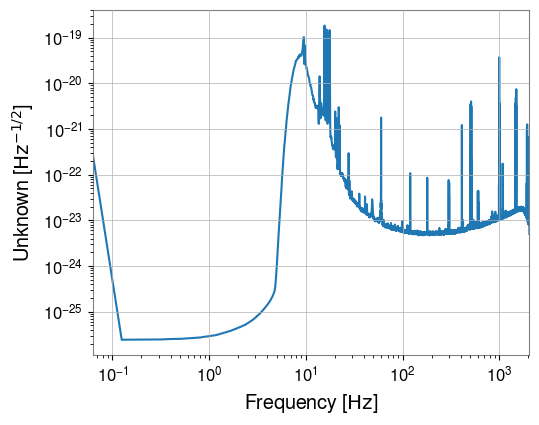

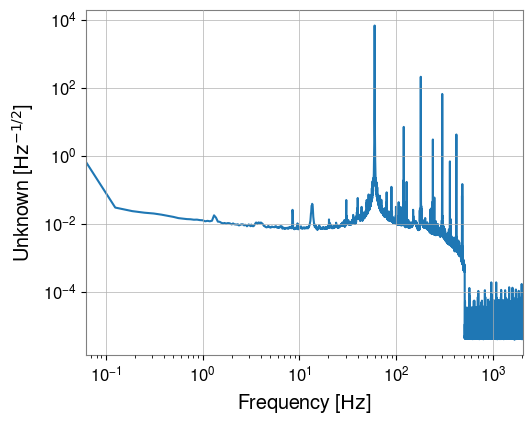

In [8]:
strain_tensor = torch.tensor(strain_array)
strain_array3 = strain_tensor.cpu().numpy()
strain3 = TimeSeries(
    strain_array3,
    t0 = gps_start,
    sample_rate=4096
)
strain3_asd = strain3.asd(fftlength=fftlength, overlap=overlap)
strain3_asd.plot().show()

witness_tensor = torch.tensor(witness_array)
witness_array3 = witness_tensor.cpu().numpy()
witness3 = TimeSeries(
    witness_array3,
    t0 = gps_start,
    sample_rate=4096
)
witness3_asd = witness3.asd(fftlength=fftlength, overlap=overlap)
witness3_asd.plot().show()